<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Teoría de Circuitos II

# Tutorial de Jupyter Notebook: Rotador de Fase
#### Por Mariano Llamedo Soria


# Introducción a Jupyter Notebook
Jupyter Notebook es una herramienta para la confección de reportes técnicos, dado que permite la interacción en el mismo ambiente de: 
1. un procesador de texto elemental (formato Markdown) que permite resaltar texto, en forma de *itálica* o **negrita** de manera muy legible (haciendo doble click en este texto podrás ver el código fuente estilo Markdown). Cuenta con estilos predefinidos:

# Título 1
## Título 2
### Título 3

y también la capacidad de incluir enlaces a otras páginas, como por ejemplo [esta página](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed) donde encontrarás más funcionalidades del lenguaje **Markdown**

2. capacidad para incluir lenguaje matemático estilo LaTex, tanto de forma presentada

\begin{equation}
T(z) = \frac{Y(z)}{X(z)} = \frac{ b_2 \, z^{-2} + b_1 \,  z^{-1} + b_0 }
{a_2 \, z^{-2} + a_1 \,  z^{-1} + a_0}
\end{equation}

como *inline* en el propio párrafo $y[k] = \frac{1}{a_0} \left( \sum_{m=0}^{M} b_m \; x[k-m] - \sum_{n=1}^{N} a_n \; y[k-n] \right) $

3. La posibilidad de incluir scripts en Python, como los que usaremos para las simulaciones en los TPs de la materia. En este caso usaremos el *testbench0.py* como ejemplo. Una vez que lo probamos y estamos seguros que funciona de forma esperada en *Spyder*, podemos incluir los resultados de la simulación de manera casi transparente. Solo tenemos que agregar una celda de código donde incluimos el código, y los resultados directamente quedan incluidos en este documento.

# Circuito Pasa-todo o Rotador de fase de primer orden
Como se analizó en clase, el circuito correspondiente a un rotador de fase de primer orden analizado en el TP1

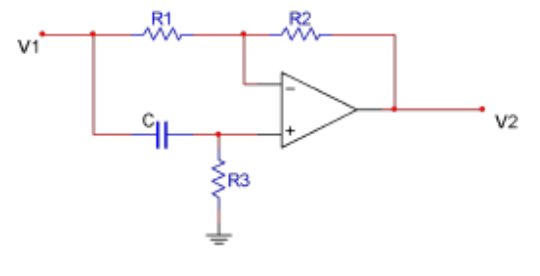

tiene una transferencia dada por

\begin{equation}
H(s) = \frac{s-\frac{k}{R_3·C_4} }{s+\frac{1}{R_3·C_4}},
\end{equation}

para $k= \frac{R_2}{R_1}$. Este circuito, por un lado no afecta el módulo de la señal de entrada, es decir $ \lvert H(\omega) \rvert = 1$, mientras provoca una rotación de fase en torno a la frecuencia $\omega_0 =  \frac{1}{R_3·C_4}$. En la siguiente simulación se presenta la respuesta en frecuencia y un diagrama de polos y ceros de dicho circuito.

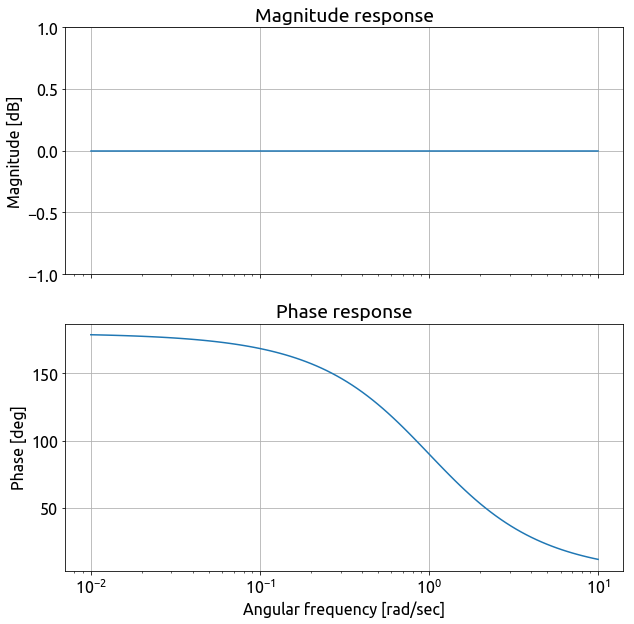

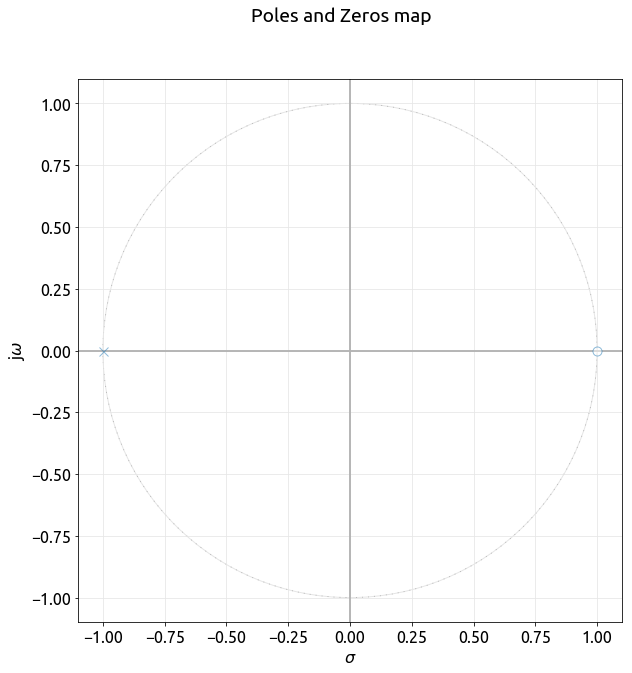

In [4]:
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

# módulo de SciPy
from scipy import signal as sig


# un módulo adaptado a mis necesidades
from splane import bodePlot, pzmap
        
# Definimos los valores de los componentes. Pueden cambiarse, luego volver a ejecutar la celda actual.
R1 = 1
R2 = 1
R3 = 1
C4 = 1

# Constante de ganancia del inversor'
K_inv = R2 / R1

# Cargamos la funcion transferencia

num = np.array([ 1., -K_inv / R3 * C4])
den = np.array([ 1., 1. / R3 * C4])

H = sig.TransferFunction( num, den )

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(H)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
plt.ylim([-1,1])

plt.gca

pzmap(H)

plt.show()


# Una vez terminado ...
Una vez que hayas termiando con la confección del documento, podemos utilizar una ventaja muy importante de este tipo de documentos que es la posibilidad de compartirlos *online* mediante la [página de nbviewer](http://nbviewer.jupyter.org/). Para ello es necesario que tu notebook y todos los recursos asociados estén alojados en un repositorio de [Github](https://github.com/). Como ejemplo, podés ver este mismo documento disponible [online](https://nbviewer.jupyter.org/github/marianux/jupytest/blob/master/rotador_de_fase.ipynb).